In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

Read Local Law 84 Data

In [7]:
energyAndWaterData2014 = pd.read_csv(filepath_or_buffer="../Energy_and_Water_Data_Disclosure_for_Local_Law__2014_.csv", 
                                     na_values=('Not Available'))
energyAndWaterData2013 = pd.read_csv(filepath_or_buffer="../Energy_and_Water_Data_Disclosure_for_Local_Law_84__2013_.csv", 
                                     na_values=('Not Available'))
energyAndWaterData2012 = pd.read_csv(filepath_or_buffer="../Energy_and_Water_Data_Disclosure_for_Local_Law_84__2012_.csv", 
                                     na_values=('Not Available'))
energyAndWaterData2011 = pd.read_csv(filepath_or_buffer="../Energy_and_Water_Data_Disclosure_for_Local_Law_84__2011_.csv", 
                                     na_values=('Not Available'))

There are duplicates in data 2013 and 2014 due to emissions being reported under the primary BBL. Get rid of secondary buildings

In [8]:
primaryEnergyAndWaterData2014 = energyAndWaterData2014[energyAndWaterData2014['Site EUI(kBtu/ft2)']!='See Primary BBL']
primaryEnergyAndWaterData2013 = energyAndWaterData2013[energyAndWaterData2013['Site EUI(kBtu/ft2)']!='See Primary BBL']


Convert numeric fields to numeric for 2013 and 2014

In [9]:
listToConvert = ['Site EUI(kBtu/ft2)',
    'Weather Normalized Site EUI(kBtu/ft2)',
    'Source EUI(kBtu/ft2)',
    'Weather Normalized Source EUI(kBtu/ft2)',
    'ENERGY STAR Score',
    'Total GHG Emissions(MtCO2e)',
    'Direct GHG Emissions(MtCO2e)',
    'Indirect GHG Emissions(MtCO2e)',
    'Reported Property Floor Area (Building(s)) (ft²)',
    'DOF Number of Buildings']

numericCols2014 = primaryEnergyAndWaterData2014[listToConvert].apply(lambda x: pd.to_numeric(x, errors='coerce'))
numeric2014 = pd.concat([primaryEnergyAndWaterData2014.drop(labels=listToConvert,axis=1),numericCols2014], axis=1)

numericCols2013 = primaryEnergyAndWaterData2013[listToConvert].apply(lambda x: pd.to_numeric(x, errors='coerce'))
numeric2013 = pd.concat([primaryEnergyAndWaterData2013.drop(labels=listToConvert,axis=1),numericCols2013], axis=1)



Only Energy Start Scores in 2012 data needs to be converted to numeric. All other columns are OK

In [10]:
numeric2012 = energyAndWaterData2012.copy()
numeric2012['ENERGY STAR Score']=pd.to_numeric(energyAndWaterData2012['ENERGY STAR Score'], errors='coerce')

GHG emissions reporting

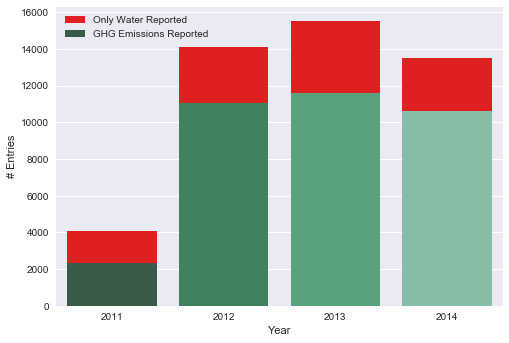

In [12]:


TotalCounts2011 = len(energyAndWaterData2011)
TotalCounts2012 = len(numeric2012)
TotalCounts2013 = len(numeric2013)
TotalCounts2014 = len(numeric2014)

GHGReported2011 = energyAndWaterData2011[energyAndWaterData2011['GHG'].notnull() 
                                              & energyAndWaterData2011['GHG'] !=0]
GHGReported2012 = numeric2012[numeric2012['Total GHG Emissions(MtCO2e)'].notnull()
                                 & numeric2012['Total GHG Emissions(MtCO2e)'] != 0]
GHGReported2013 = numeric2013[numeric2013['Total GHG Emissions(MtCO2e)'].notnull()
                                 & numeric2013['Total GHG Emissions(MtCO2e)'] != 0]
GHGReported2014 = numeric2014[numeric2014['Total GHG Emissions(MtCO2e)'].notnull()
                                 & numeric2014['Total GHG Emissions(MtCO2e)'] != 0]

x = np.arange(2011,2015)
sns.barplot(x = x, y = [TotalCounts2011, TotalCounts2012, TotalCounts2013, TotalCounts2014], color = "red", label='Only Water Reported')
bottom_plot= sns.barplot(x=x, y=[len(GHGReported2011),
                                 len(GHGReported2012),
                                 len(GHGReported2013),
                                 len(GHGReported2014)], palette="BuGn_d", label="GHG Emissions Reported")

#topbar = plt.Rectangle((0,0),1,1,fc="red", edgecolor = 'none')
#bottombar = plt.Rectangle((0,0),1,1,  edgecolor = 'none')
#l = plt.legend([bottombar, topbar], ['Bottom Bar', 'Top Bar'], loc=1, ncol = 2, prop={'size':16})
#l.draw_frame(False)

sns.despine(left=True)
bottom_plot.set_ylabel("# Entries")
bottom_plot.set_xlabel("Year")

plt.legend(loc="upper left")

plt.show()

Not what I expected. It seems Total GHG emissions have increased over the years. Numbers seems to be quite high compared to what has been reported for 2014.

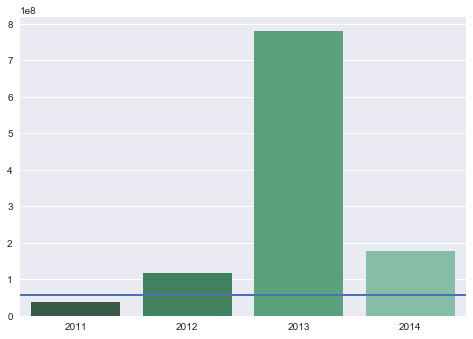

In [14]:
BuildingGHGEmissions2014 = GHGReported2014['Total GHG Emissions(MtCO2e)']
BuildingGHGEmissions2013 = GHGReported2013['Total GHG Emissions(MtCO2e)']
BuildingGHGEmissions2012 = GHGReported2012['Total GHG Emissions(MtCO2e)']
BuildingGHGEmissions2011 = GHGReported2011['GHG']

x = np.arange(2011,2015)
y1 = [BuildingGHGEmissions2011.sum(),BuildingGHGEmissions2012.sum(),BuildingGHGEmissions2013.sum(),BuildingGHGEmissions2014.sum()]
sns.barplot(x, y1, palette="BuGn_d")
#ax1.set_ylabel("Sequential")
plt.plot([-1, 4], [55.61e6, 55.61e6], linewidth=2)
plt.show()

Keep only column that I need and standardize column names so that all 4 years of data can be combined later

In [534]:
LL2014 = GHGReported2014[['NYC Borough, Block, and Lot (BBL)',
                'Street Number',
                'Street Name',
                'Borough',
                'Zip Code',
                'Site EUI(kBtu/ft2)',
                'Weather Normalized Site EUI(kBtu/ft2)',
                'Source EUI(kBtu/ft2)',
                'Weather Normalized Source EUI(kBtu/ft2)',
                'ENERGY STAR Score',
                'Total GHG Emissions(MtCO2e)',
                'Direct GHG Emissions(MtCO2e)',
                'Indirect GHG Emissions(MtCO2e)',
                'Primary Property Type - Self Selected',
                'Reported Property Floor Area (Building(s)) (ft²)']]
#Rename for ease of use
LL2014.columns = ['BBL',
                'StreetNumber',
                'StreetName',
                'Borough',
                'Zip',
                'SiteEUI',
                'WNsiteEUI',
                'SourceEUI',
                'WNsourceEUI',
                'EnergyStar',
                'TotalGHG',
                'DirectGHG',
                'IndirectGHG',
                'PropertyType',
                'FloorArea']
LL2014['YearReported'] = 2014

LL2013 = GHGReported2013[['NYC Borough, Block, and Lot (BBL)',
                'Street Number',
                'Street Name',
                'Borough',
                'Zip Code',
                'Site EUI(kBtu/ft2)',
                'Weather Normalized Site EUI(kBtu/ft2)',
                'Source EUI(kBtu/ft2)',
                'Weather Normalized Source EUI(kBtu/ft2)',
                'ENERGY STAR Score',
                'Total GHG Emissions(MtCO2e)',
                'Direct GHG Emissions(MtCO2e)',
                'Indirect GHG Emissions(MtCO2e)',
                'Primary Property Type - Self Selected',
                'Reported Property Floor Area (Building(s)) (ft²)']]

LL2013.columns = ['BBL',
                'StreetNumber',
                'StreetName',
                'Borough',
                'Zip',
                'SiteEUI',
                'WNsiteEUI',
                'SourceEUI',
                'WNsourceEUI',
                'EnergyStar',
                'TotalGHG',
                'DirectGHG',
                'IndirectGHG',
                'PropertyType',
                'FloorArea']
LL2013['YearReported'] = 2013

LL2012 = GHGReported2012[['BBL',
                'Street Number',
                'Street Name',
                'Borough',
                'Zip',
                'Site EUI(kBtu/ft2)',
                'Weather Normalized Source EUI(kBtu/ft2)',
                'ENERGY STAR Score',
                'Total GHG Emissions(MtCO2e)',
                'Primary Property Type - Self Selected',
                'Property Floor Area (Buildngs and Parking)(ft2)']]
LL2012.columns = ['BBL',
                'StreetNumber',
                'StreetName',
                'Borough',
                'Zip',
                'SiteEUI',
                'WNsourceEUI',
                'EnergyStar',
                'TotalGHG',
                'PropertyType',
                'FloorArea']

LL2012['YearReported'] = 2012

LL2011 = GHGReported2011[['BBL',
                'Street Number',
                'Street Name',
                'Borough',
                'Zip',
                'Site EUI',
                'Weather Normalized Source EUI',
                'ENERGY STAR Score',
                'GHG',
                'Reported Facility Type',
                'Reported Building Square Footage']]
LL2011.columns = ['BBL',
                'StreetNumber',
                'StreetName',
                'Borough',
                'Zip',
                'SiteEUI',
                'WNsourceEUI',
                'EnergyStar',
                'TotalGHG',
                'PropertyType',
                'FloorArea']
LL2011['YearReported'] = 2011

/Users/cooldude/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/cooldude/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:65: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/cooldude/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:90: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-do

Controlling for outliers:
    Use Site EUI of 60,000 KBTU/ft2 as the cut off for outliers. After controlling for outliers, data shows that total green house gas emissions have decrease after 2012. 2014 total GHG emissions number is in the same ball park of 70%(arounf 70% of NYC's GHG emissions come from buildings) of the NYC officially reported total GHG emissions

In [545]:
outliersLL2014 = LL2014[LL2014['SiteEUI']>=60000]
outliersLL2013 = LL2013[LL2013['SiteEUI']>=60000]
outliersLL2012 = LL2012[LL2012['SiteEUI']>=60000]
outliersLL2011 = LL2011[LL2011['SiteEUI']>=60000]

LL2014 = LL2014[LL2014['SiteEUI']<60000]
LL2013 = LL2013[LL2013['SiteEUI']<60000]
LL2012 = LL2012[LL2012['SiteEUI']<60000]
LL2011 = LL2011[LL2011['SiteEUI']<60000]


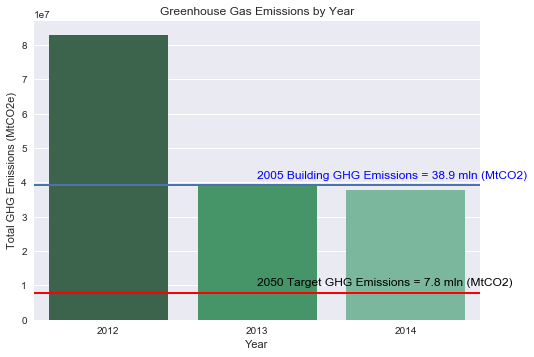

In [546]:
LLCombined = LL2014.append(LL2013).append(LL2012)
LLCombined = LLCombined[(LLCombined['FloorArea'].notnull()) & (LLCombined['FloorArea'] > 10e3)]

sns.barplot('YearReported', 'TotalGHG', data=LLCombined, palette="BuGn_d",estimator=sum, ci=None)
#ax1.set_ylabel("Sequential")
plt.plot([-1, 4], [56e6*.7, 56e6*.7], linewidth=2)
plt.plot([-1, 4], [56e6*.7*.2, 56e6*.7*.2], linewidth=2,color='Red')
plt.title('Greenhouse Gas Emissions by Year')
plt.ylabel('Total GHG Emissions (MtCO2e)')
plt.xlabel('Year')
plt.text(1, 41e6, '2005 Building GHG Emissions = 38.9 mln (MtCO2)', color='Blue')
plt.text(1, 10e6, '2050 Target GHG Emissions = 7.8 mln (MtCO2)', color='Black')
#plt.ticklabel_format(style='plain', axis='y')
plt.savefig('totalGHGEbyYear.png')
plt.show()

#

Actual 2014 vs Target

In [563]:
actual2014GHGemissions = LL2014.loc[LL2014['YearReported']==2014,'TotalGHG'].sum()/1e6
target2050GHGemissions = 55.61*.7*.2
totalSqftOfAllBuildings = LL2014['FloorArea'].sum()
currentGHGPerSqft = actual2014GHGemissions * 1e6 / totalSqftOfAllBuildings
targetGHGPerSqft = target2050GHGemissions * 1e6 / totalSqftOfAllBuildings
reductionNeededGHGPerSqft = currentGHGPerSqft - targetGHGPerSqft
print('2005 Total GHG emissions per square foot: {0:0.8f} (MtCO2e/ft2)'.format(55.61*.7*1e6/totalSqftOfAllBuildings))
print('2014 Total GHG emissions per square foot: {0:0.8f} (MtCO2e/ft2)'.format(currentGHGPerSqft))
print('Target GHG emissions per square foot: {0:0.8f} (MtCO2e/ft2)'.format(targetGHGPerSqft))
print('Reduction in GHG emissions per square foot Needed to achieve 2050 target: {0:0.8f} (MtCO2e/ft2)'.format(reductionNeededGHGPerSqft))

2005 Total GHG emissions per square foot: 0.02033637 (MtCO2e/ft2)
2014 Total GHG emissions per square foot: 0.01980642 (MtCO2e/ft2)
Target GHG emissions per square foot: 0.00406727 (MtCO2e/ft2)
Reduction in GHG emissions per square foot Needed to achieve 2050 target: 0.01573915 (MtCO2e/ft2)


Calculate GHG emissions per square foot

In [506]:
LLCombined['TotalGHGPerSqft'] = LLCombined['TotalGHG'] / LLCombined['FloorArea']

2014 GHG emission by property type

In [507]:
top5 = LL2014.groupby('PropertyType')[['TotalGHG']].sum().sort_values('TotalGHG', ascending=False).head(4)

LLCombined['SimplePropertyType'] = LLCombined['PropertyType']
LLCombined.loc[~LLCombined['PropertyType'].isin(top5.index),'SimplePropertyType'] = 'Other'


2014 GHG emission by property type

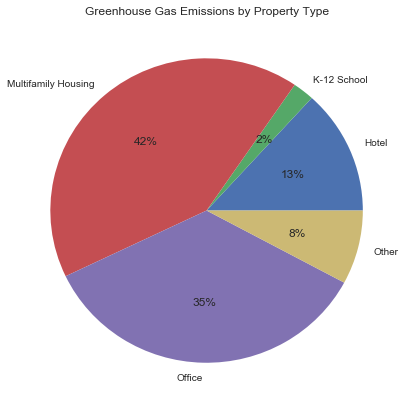

In [508]:
LL2014 = LLCombined[LLCombined['YearReported'] == 2014]
LL2014.groupby('SimplePropertyType').TotalGHG.sum().plot.pie(autopct='%.0f%%',figsize=(7, 7))

plt.title('Greenhouse Gas Emissions by Property Type')

plt.ylabel('')
plt.savefig('GHGemissions2014ByPropertyType.png')
plt.show()

#

Mean GHG emissions by property type from 2012 to 2014

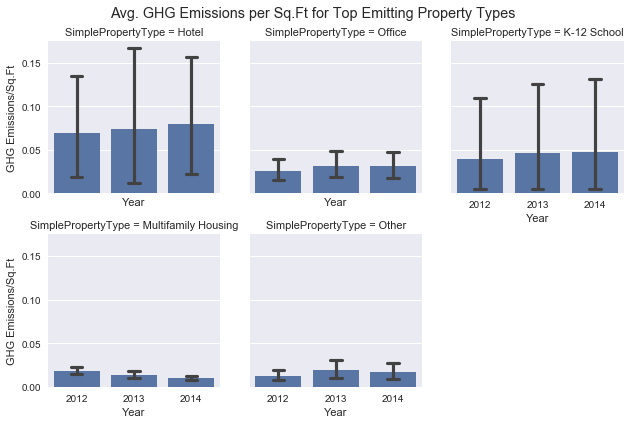

In [509]:
g = sns.FacetGrid(LLCombined, col='SimplePropertyType',size=3,col_wrap=3)
ax = g.map(sns.barplot,"YearReported", "TotalGHGPerSqft",capsize=.2)
#plt.show()
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Avg. GHG Emissions per Sq.Ft for Top Emitting Property Types')
g.savefig('AvgGHGEmissionsPerSqftForTopEmitterByYear.png')
g.axes[0].set_ylabel('GHG Emissions/Sq.Ft')
g.axes[3].set_ylabel('GHG Emissions/Sq.Ft')
for ax in g.axes:
    ax.set_xlabel('Year')
plt.savefig('AvgGHGEmissionsPerSqftForTopEmitterByYear.png')
plt.show()

Load oil boiler data

In [365]:
boilerData2014 = pd.read_csv(filepath_or_buffer='../Oil_Boilers_-_Detailed_Fuel_Consumption_and_Building_Data2.csv')
boilerData2014 = boilerData2014[boilerData2014['Borough, Block and Lot #'].notnull()]
boilerData2014['HasBoiler'] = True

columns = ['Borough, Block and Lot #', 
       'Boiler Model', 'Number of identical boilers',
       'Boiler capacity (Gross BTU)', 'Boiler Installation Date',
       'Estimated retirement date of boiler (assuming 35 year average useful life)',
       'Is boiler dual fuel capable?', 
       'Age range of boiler', 
       'Burner Model',
       'Primary Fuel', 
       'Total Estimated Cosumption - High Estimate (Gallons) ',
       'Total Estimated Cosumption - Low Estimate (Gallons) ',
       'Total Estimated Cosumption - High Estimate (MMBTUs) ',
       'Total Estimated Cosumption - Low Estimate  (MMBTUs) ',
       'Building Type', 
       'Total area of buildings on lot',
       'Number of buildings on property (tax lot)', 
       'Number of floors',
       'Number of residential units', 
       'Number of total units',
       'Year constructed', 
       'Condominium housing?', 
       'Cooperative housing?',
       'HasBoiler']
selectBoilerData2014 = boilerData2014[columns]
selectBoilerData2014.rename(columns={'Borough, Block and Lot #':'BBL'}, inplace=True);

/Users/cooldude/anaconda/lib/python3.6/site-packages/pandas/core/frame.py:2834: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  **kwargs)


Merge oil boiler data with LL 84 data for 2014

In [366]:
LL2014withBoilerData = LL2014.merge(selectBoilerData2014,how='left',on='BBL')
LL2014withBoilerData.loc[LL2014withBoilerData['HasBoiler'].isnull(),'HasBoiler'] = False


In [367]:
t = LL2014withBoilerData[LL2014withBoilerData['HasBoiler']]

floorRange = pd.cut(t['Number of floors'], (1,6,10,15,25,50,100), labels=('<6','6-10','10-15','15-25','25-50','50-100'))

t['FloorRange'] = floorRange

#g = sns.FacetGrid(t, col="day", size=4, aspect=.5)
#g.map(sns.barplot, "sex", "total_bill");

/Users/cooldude/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


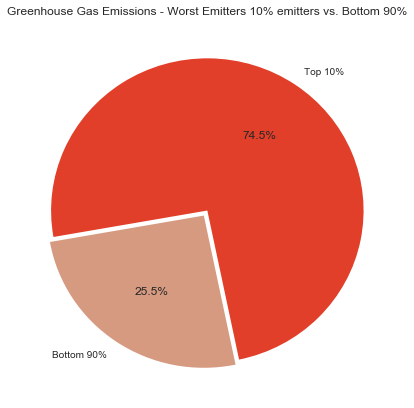

In [513]:
t = LL2014withBoilerData.copy()
t['WorstGHGEmitters'] = 'Bottom 90%'
t.loc[t['TotalGHGPerSqft'].quantile(.9)<t['TotalGHGPerSqft'],'WorstGHGEmitters'] = 'Top 10%'
t.groupby('WorstGHGEmitters')['TotalGHG'].sum().plot.pie(y='TotalGHG',autopct='%.1f%%', 
                                                         explode=(0.04,0),
                                                         startangle=190,
                                                        colors = ("#D69A80","#E13F29"),
                                                        figsize=(7, 7))
plt.title('Greenhouse Gas Emissions - Worst Emitters 10% emitters vs. Bottom 90%')
plt.ylabel('')
plt.savefig('WorstEmitters2014Pie.png')
plt.show()

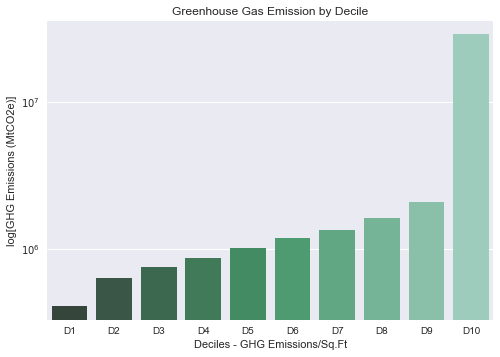

In [437]:
t = LL2014withBoilerData.copy()
t['TotalGHGPerSqftDecile'] = pd.qcut(t['TotalGHGPerSqft'],10,labels=['D1','D2','D3','D4','D5','D6','D7','D8','D9','D10'])
totalGHGbyDecile = t.groupby('TotalGHGPerSqftDecile', as_index=False)[['TotalGHG']].sum()
sns.barplot('TotalGHGPerSqftDecile', 'TotalGHG', data=totalGHGbyDecile, palette="BuGn_d",estimator=sum, ci=None)
plt.yscale('log')
plt.title('Greenhouse Gas Emission by Decile')
plt.ylabel('log[GHG Emissions (MtCO2e)]')
plt.xlabel('Deciles - GHG Emissions/Sq.Ft')
plt.savefig('GHGEmissionbyDecile2014.png')
plt.show()

Contrary to the popular belief, only 12% of total greenhouse gas emissions in NYC come from boilers

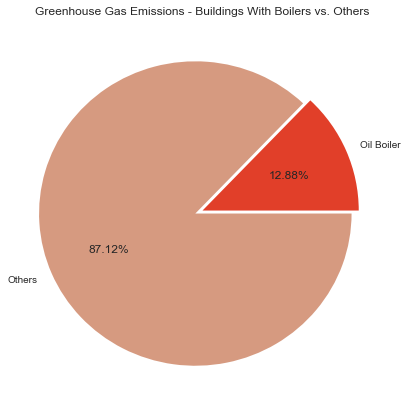

In [515]:
t2 = t.copy()
t2['HasBoiler'] = t['HasBoiler'].apply(lambda x:'Oil Boiler' if x else 'Others')
t2.groupby('HasBoiler')['TotalGHG'].sum().plot.pie(y='TotalGHG',autopct='%.2f%%', explode=(0,0.05),
                                                   colors=("#E13F29","#D69A80"),figsize=(7, 7))
plt.ylabel('')
plt.title('Greenhouse Gas Emissions - Buildings With Boilers vs. Others')
plt.savefig('OilBoilerEmissionsAsPct2014.png')
plt.show()

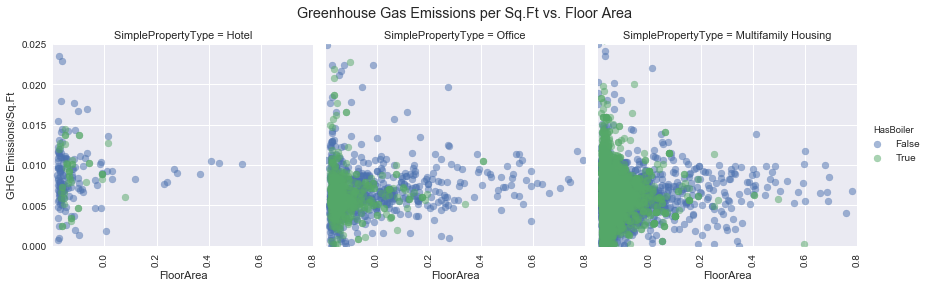

In [417]:
t = LL2014withBoilerData[(LL2014withBoilerData['PropertyType']=='Multifamily Housing') | 
                         (LL2014withBoilerData['PropertyType']=='Office') | 
                        (LL2014withBoilerData['PropertyType']=='Hotel')]


g = sns.FacetGrid(t, col='SimplePropertyType',size=4,col_wrap=3, hue='HasBoiler')
g = g.map(plt.scatter,'FloorArea', 'TotalGHGPerSqft',alpha=.5).add_legend();
#plt.xscale('log')
g.set_xticklabels(rotation=90)
plt.xlim(10e3,2.5e6)
plt.ylim((0,.025))
plt.subplots_adjust(top=0.85)
g.fig.suptitle('Greenhouse Gas Emissions per Sq.Ft vs. Floor Area')
g.axes[0].set_ylabel('GHG Emissions/Sq.Ft')

plt.savefig('ScatterGHGPerSqFtvsArea.png')
plt.show()

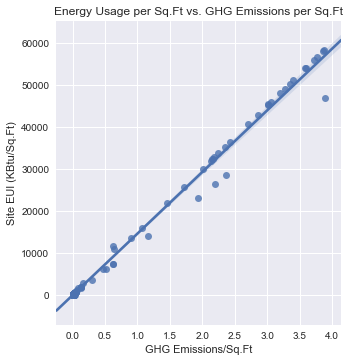

In [501]:
sns.lmplot('TotalGHGPerSqft', 'SiteEUI',data=LL2014withBoilerData)
#plt.xscale('log')
#plt.yscale('log')
g.set_xticklabels(rotation=90)
#plt.xlim(10e3,2.5e6)
#plt.ylim((0,.025))
plt.ylabel('Site EUI (KBtu/Sq.Ft)')
plt.xlabel('GHG Emissions/Sq.Ft')
plt.title('Energy Usage per Sq.Ft vs. GHG Emissions per Sq.Ft')
plt.savefig('ScatterSiteEUIvsGHGPerSqFt.png')
plt.show()